<a href="https://colab.research.google.com/github/Ammu-Teju/EDA-analysis-on-cars-sales/blob/main/EDA_analysis_on_car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Problem Statement


"This dataset was collected by Anton Bobanev from car sale advertisements for study/practice purposes in 2016".

Importing all needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ignoring Warnings

In [ ]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

Importing datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
carsales_data = pd.read_csv("/content/postprocessing_car_sales.csv")
carsales_data

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,front
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [ ]:
carsales_data.shape

(9576, 10)

carsales_data has 9576 rows and 10 columns.

In [ ]:
carsales_data.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [ ]:
carsales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,front


In [ ]:
carsales_data.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [ ]:
carsales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9576 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9576 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [ ]:
carsales_data.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9576.000000,9576,9576,9576.000000,9576,9576
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5699
mean,NaN,15633.317316,NaN,139.625522,2.617051,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,97.628397,5.793361,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,1.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [ ]:
carsales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [ ]:
total = carsales_data.isnull().sum().sort_values(ascending=False)
percent = (carsales_data.isnull().sum()/carsales_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

              Total  Percent
car               0      0.0
price             0      0.0
body              0      0.0
mileage           0      0.0
engV              0      0.0
engType           0      0.0
registration      0      0.0
year              0      0.0
model             0      0.0
drive             0      0.0


From the above output we can see that there is no missing values.



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015'),
  Text(19, 0, '2016')])

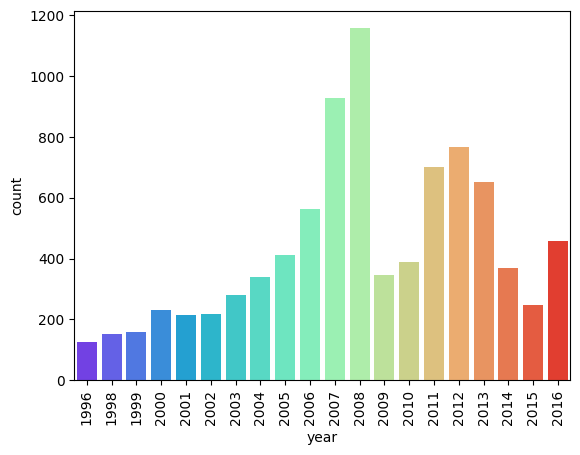

In [ ]:
# carsales_data['year'].value_counts().head(20).plot.bar()
sns.barplot(carsales_data["year"].value_counts().head(20),palette="rainbow")
plt.xticks(rotation=90)

Observation:Year 2008 has the highest number of car sales record.

<Axes: xlabel='body', ylabel='count'>

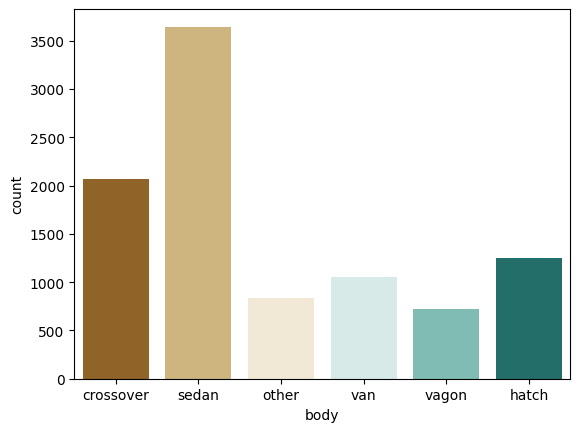

In [ ]:
sns.countplot(data=carsales_data,x="body",palette="BrBG")


Observation:Sedan are most preferred private cars. among public vehicles vans are preferred.

In [ ]:
carsales_data.columns

Index(['car', 'price', 'body', 'mileage', 'engv', 'engtype', 'registration',
       'year', 'model', 'drive', 'mileage_level'],
      dtype='object')

In [ ]:
# carsales_data.columns = map(str.lower, carsales_data.columns)
# carsales_data['drive'] = carsales_data['drive'].fillna("UnSpecified")
mileage_avg = sum(carsales_data['mileage']) / len(carsales_data['mileage'])
carsales_data['mileage_level'] = ["high mileage" if i > mileage_avg else "low mileage" for i in carsales_data['mileage']]

<Axes: xlabel='registration', ylabel='price'>

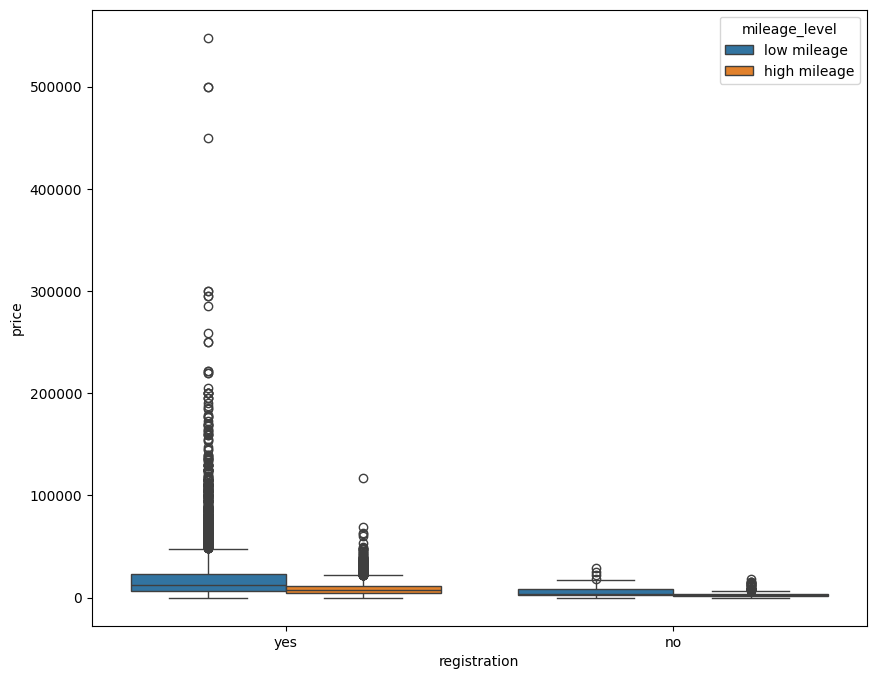

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.boxplot(x='registration',y='price',hue='mileage_level',data=carsales_data)

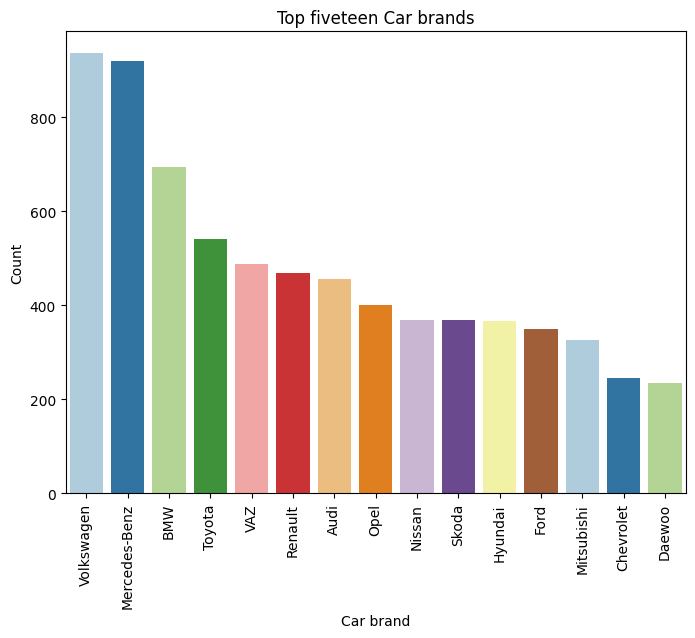

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(carsales_data["car"].value_counts().head(15),palette="Paired")

plt.title('Top fiveteen Car brands')
plt.xlabel('Car brand')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Observation:Volkswagen and Mercedes-Benz cars are the most popular car brand. followed by brand like BMW, Toyota etc.

(-1.0999981405770711,
 1.0999937751567863,
 -1.0999836502009879,
 1.0999989645334438)

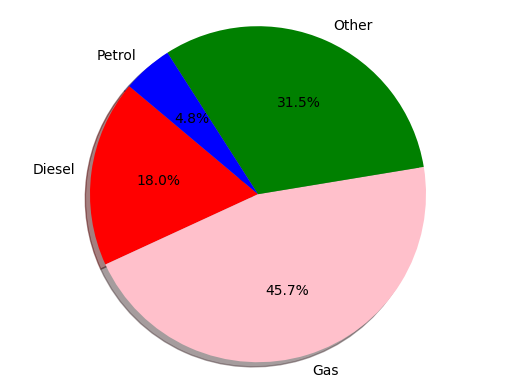

In [ ]:
ct = pd.value_counts(carsales_data['engtype'].values, sort=False)
labels = carsales_data['engtype'].unique()
labels.sort()
sizes = ct
# ct.sort_index(inplace=True)
colors = ['red', 'pink', 'green', 'blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

Observation:Petrol cars are the most widely sold Engine Type. Gas and Other fuels are not so commonly used.

<Axes: xlabel='mileage', ylabel='price'>

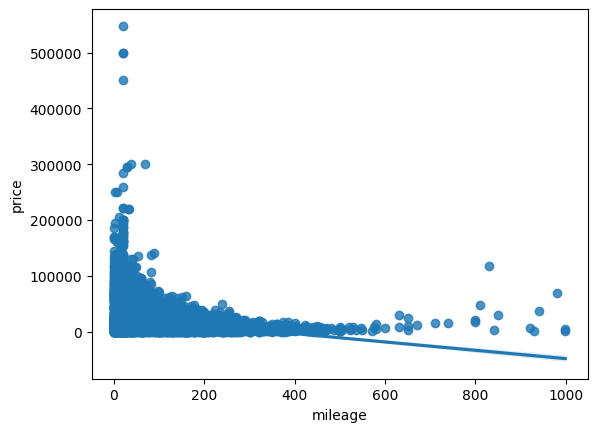

In [ ]:
# fig=plt.figure(figsize=(15,5))
# sns.scatterplot(data=carsales_data,x="mileage",y="price",palette="Paired")
# sns.regplot(data=carsales_data,x="mileage",y="price",)
carsales_data.sample(100).plot.scatter(x='mileage', y='price')
sns.regplot(x='mileage',y='price',data=carsales_data)

Observation:Mileage and price are indirectly related. high priced cars give low mileage.

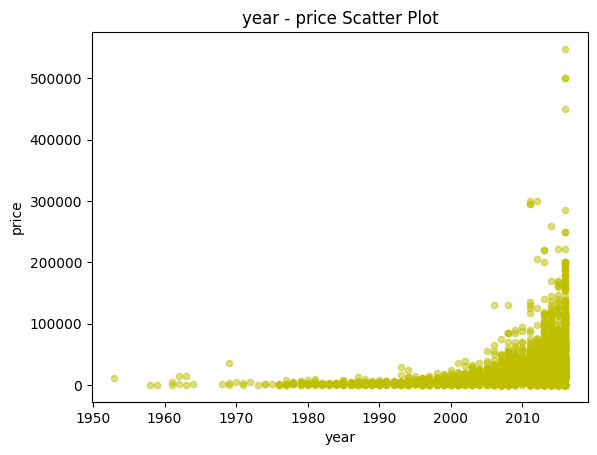

In [ ]:
carsales_data.plot(kind = 'scatter', x='year', y = 'price', alpha = 0.5, color = 'y')
plt.xlabel("year")
plt.ylabel("price")
plt.title("year - price Scatter Plot")
plt.show()

Observation:In Genaral price of all cars have increased over the period of time. Cars are costing more in recent years.

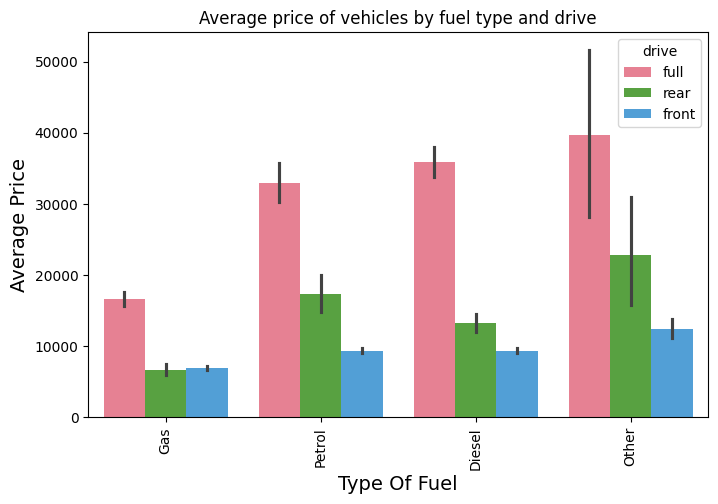

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))


sns.barplot(x="engtype", y="price", hue= "drive", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by fuel type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

Observation: Full drive cars of all engine type cars are high priced compared to other fuel types.Followed by the Rear drive cars in all fuel types. In Petrol and Diesel Front drive cars are almost equally priced.

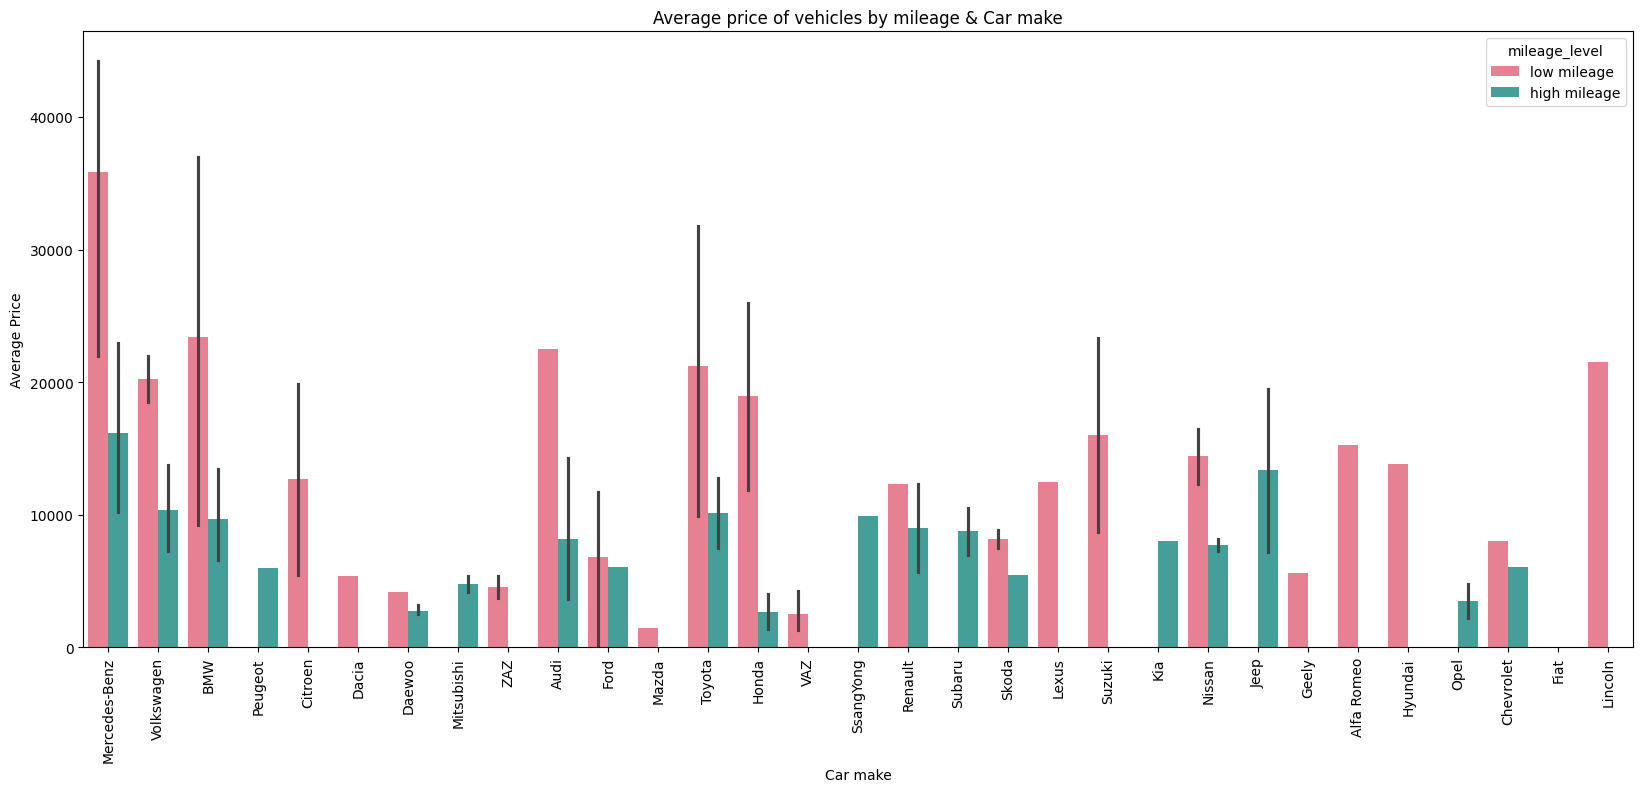

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

Carsales_Sample = carsales_data.sample(100)
sns.barplot(x="car", y="price", hue= "mileage_level", palette="husl",data=Carsales_Sample)
ax.set_title("Average price of vehicles by mileage & Car make",fontdict= {'size':12})
ax.xaxis.set_label_text("Car make",fontdict= {'size':10})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':10})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


Observation:High mileage cars are low priced and vise-versa.

Text(24.000000000000014, 0.5, 'Average Price')

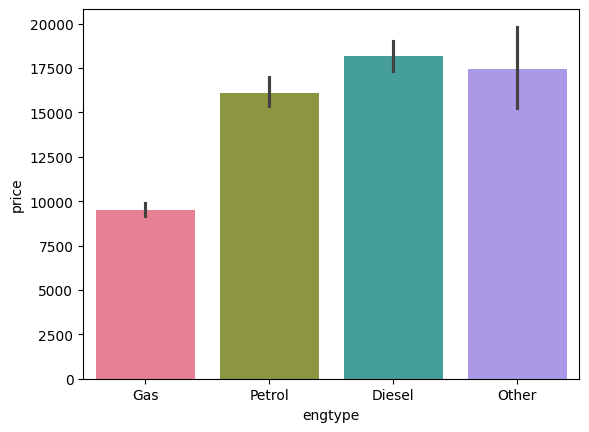

In [ ]:
#Average price of vehicle by fuel type
# barplot for price based on fuel type and gearbox type

sns.barplot(x="engtype", y="price", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by fuel typ",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})

Observation:Diesel vehicals are highly priced.

Text(0, 0.5, 'Average Mileage')

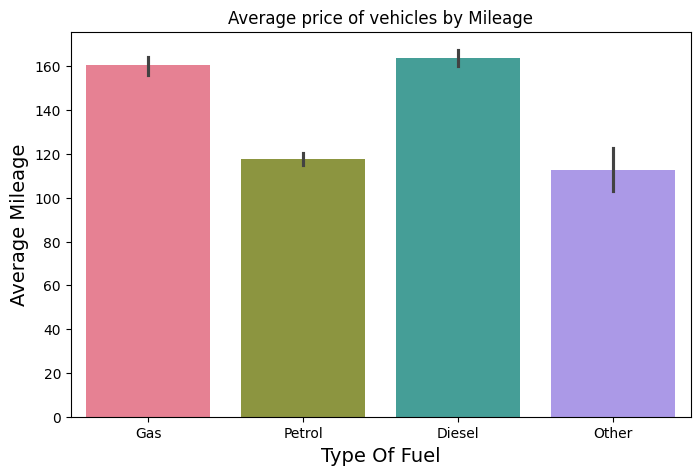

In [ ]:
# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x="engtype", y="mileage", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by Mileage",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Mileage",fontdict= {'size':14})

Observation:Diesel and Gas cars provide highest mileage.Followed by petrol cars.

<Axes: xlabel='drive'>

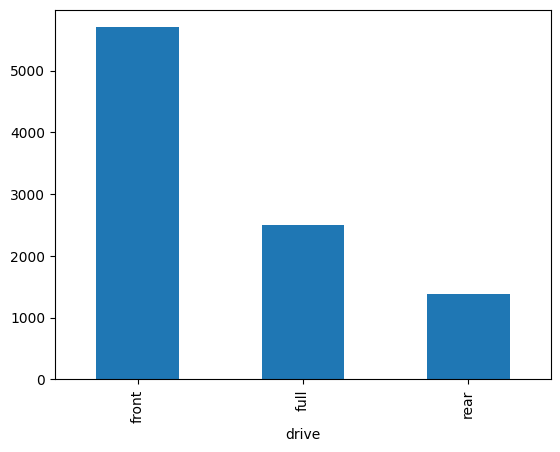

In [ ]:
carsales_data['drive'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Mileage vs Car drive')

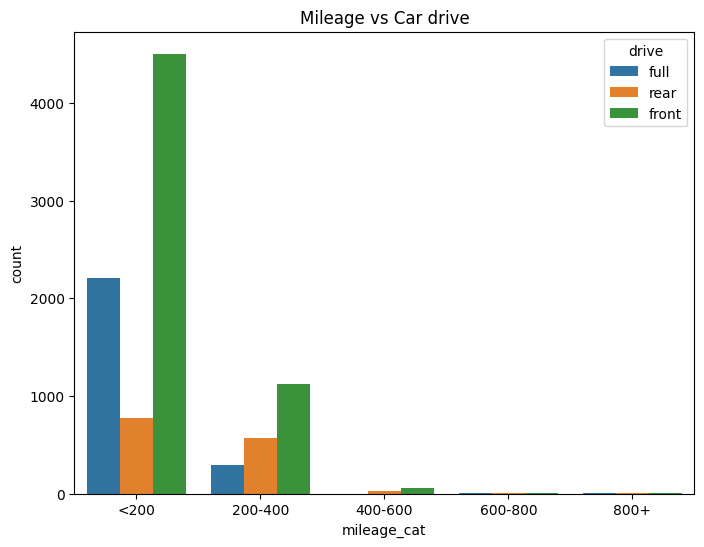

In [ ]:
carsales_data['mileage_cat'] = pd.cut(carsales_data.mileage, [0,200,400,600,800,1000], labels=['<200','200-400','400-600','600-800','800+'],  include_lowest=True)
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = carsales_data,x = 'mileage_cat',hue='drive')
plt.title('Mileage vs Car drive')

Observation: Front drive cars are most prefered because of the high mileage they provide. next is the Full drive car with very low mileage(<200).

<Axes: >

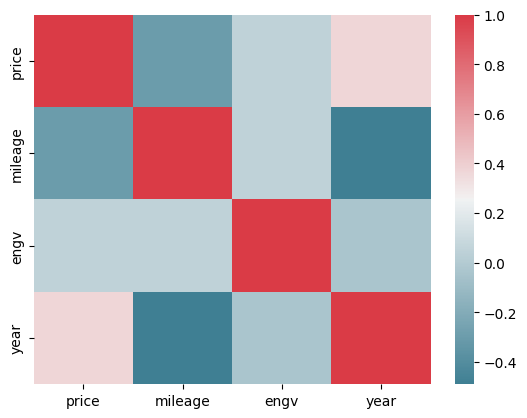

In [ ]:
corr = carsales_data.loc[:,carsales_data.dtypes != 'object'].drop('mileage_cat', axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Observation:Price-Mileage & Mileage-year are highly correalated with each other.

Text(0.5, 1.0, 'Car drive Vs. price')

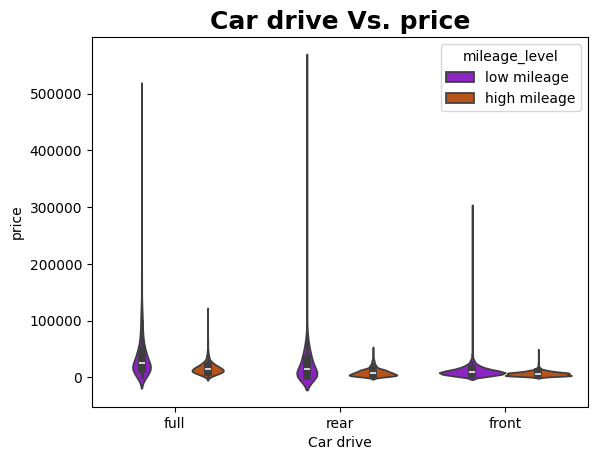

In [ ]:
ax = sns.violinplot(x="drive", y="price",hue='mileage_level', palette="gnuplot", data=carsales_data)
plt.xlabel("Car drive")
plt.ylabel("price")
plt.title("Car drive Vs. price", fontsize=18, fontweight = "bold")

Observation: In all the car drive types, low mileage car are highly priced. where as the high mileage cars are priced low.

Text(0.5, 1.0, 'Car fuel type Vs. price')

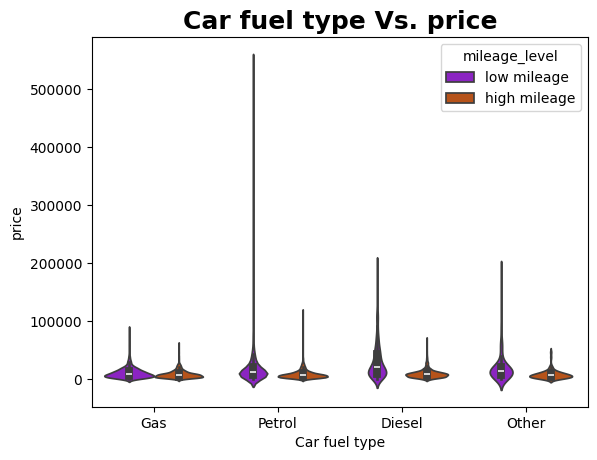

In [ ]:
ax = sns.violinplot(x="engtype", y="price",hue='mileage_level', palette="gnuplot", data=carsales_data)
plt.xlabel("Car fuel type")
plt.ylabel("price")
plt.title("Car fuel type Vs. price", fontsize=18, fontweight = "bold")

Observation: In all the fuel types, low mileage car are highly priced. where as the high mileage cars are priced low.

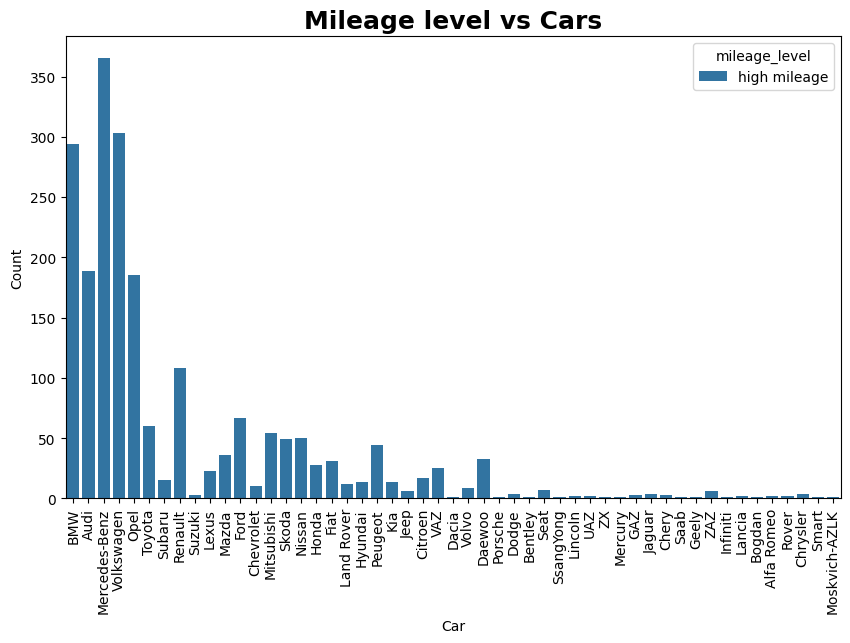

In [ ]:
carsales_plot = carsales_data[(carsales_data['mileage']> 200)]
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='car',data=carsales_plot,hue='mileage_level')
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Mileage level vs Cars", fontsize=18, fontweight = "bold")
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Observation :- Benz and Volkswagan have better mileage, hence most preferred.

In [ ]:
carsales_plot.columns

Index(['car', 'price', 'body', 'mileage', 'engv', 'engtype', 'registration',
       'year', 'model', 'drive', 'mileage_level', 'mileage_cat'],
      dtype='object')

Text(0.5, 0, '')

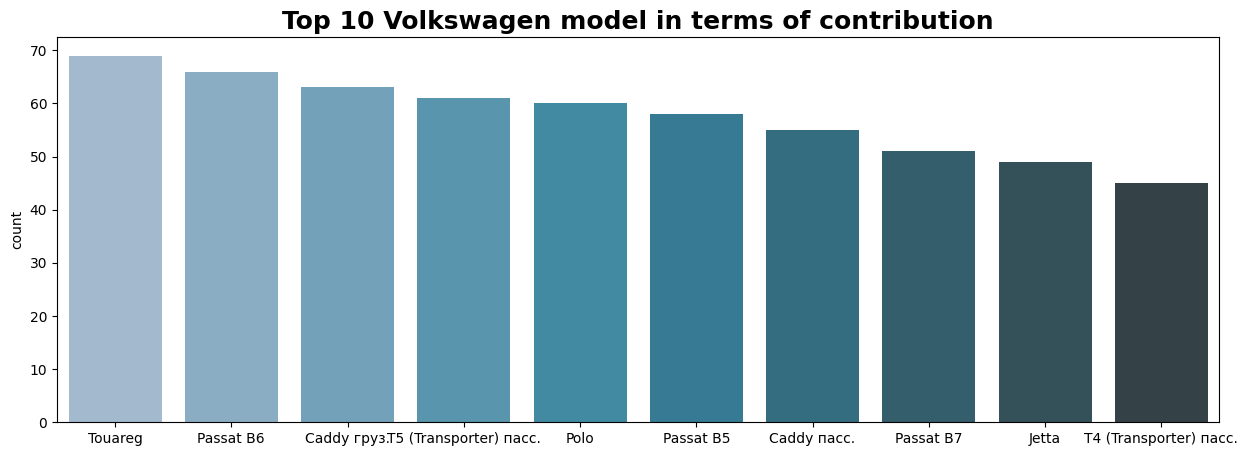

In [ ]:
car1=carsales_data.loc[carsales_data["car"]=="Volkswagen"]
top_10=car1["model"].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(top_10,palette="PuBuGn_d")
plt.title('Top 10 Volkswagen model in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')


Text(0.5, 0, '')

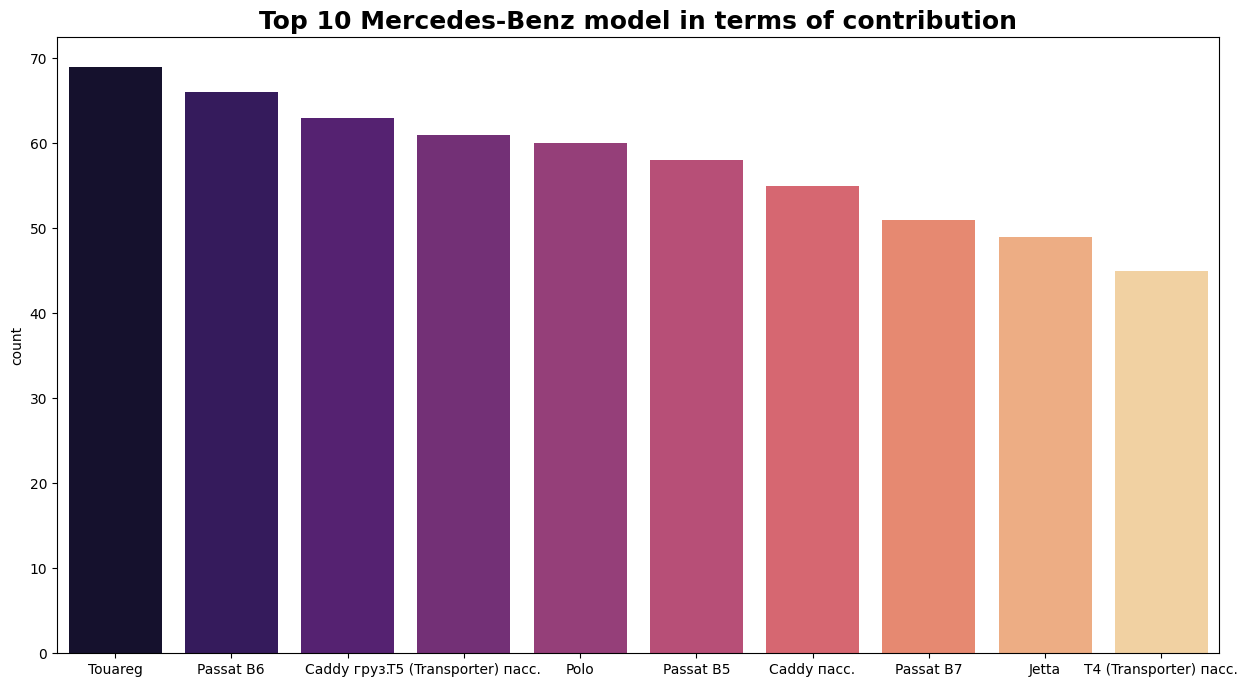

In [ ]:

car2=carsales_data.loc[carsales_data["car"]=="Mercedes-Benz"]
top_10=car1["model"].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(top_10,palette="magma")
plt.title('Top 10 Mercedes-Benz model in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')

Text(0.5, 0, '')

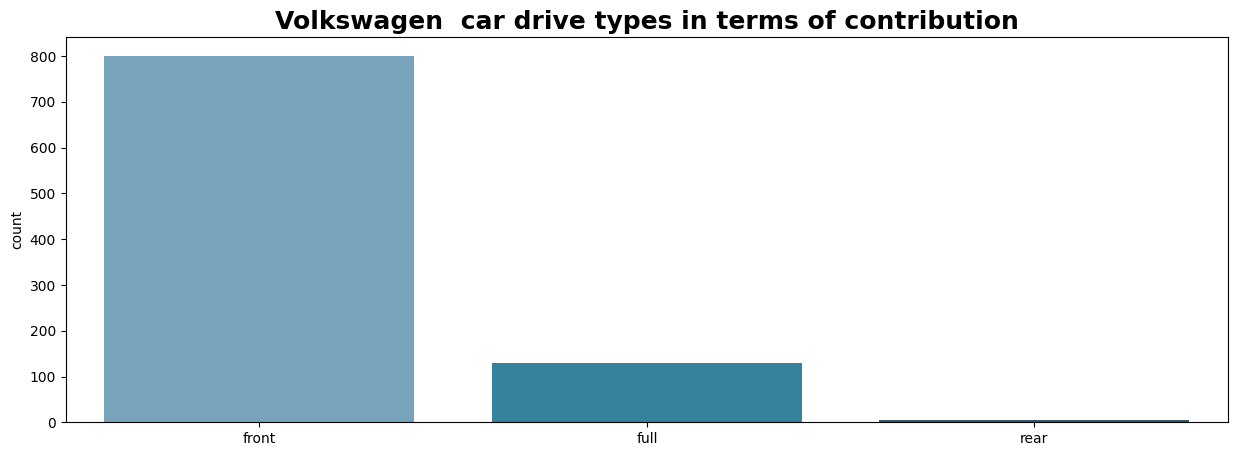

In [ ]:
car1=carsales_data.loc[carsales_data["car"]=="Volkswagen"]
top_10=car1["drive"].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(top_10,palette="PuBuGn_d")
plt.title('Volkswagen  car drive types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')


Text(0.5, 0, '')

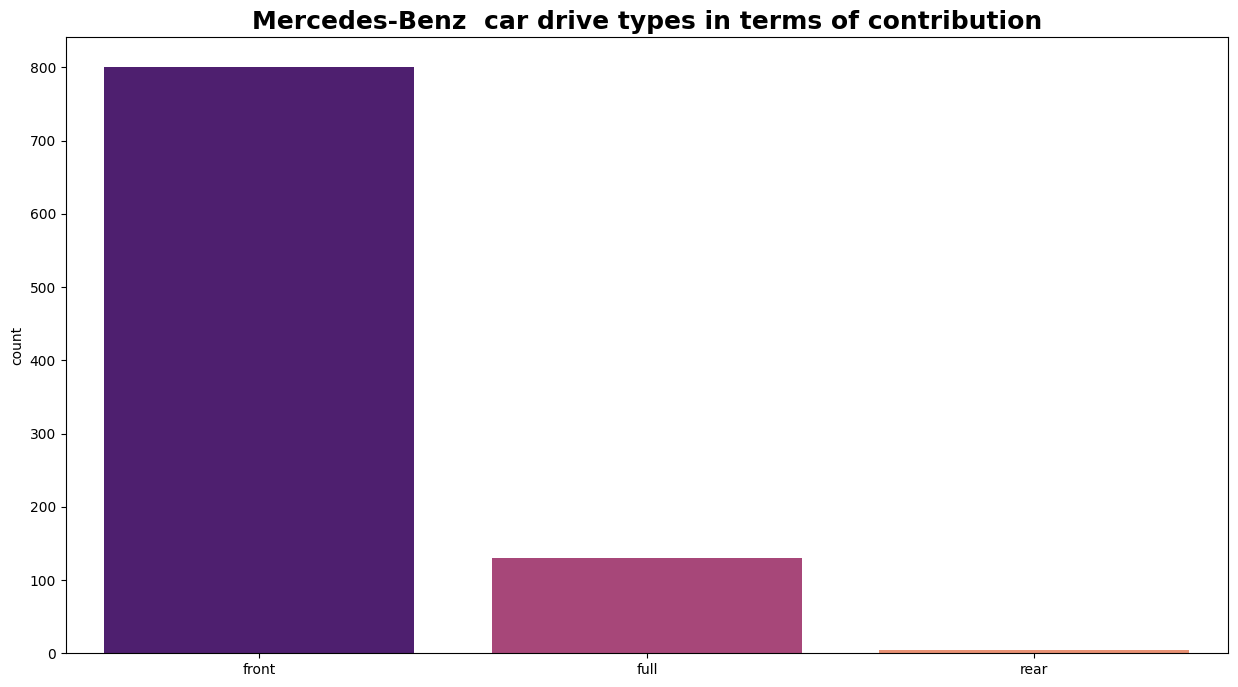

In [ ]:
car2=carsales_data.loc[carsales_data["car"]=="Mercedes-Benz"]
top_10=car1["drive"].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(top_10,palette="magma")
plt.title('Mercedes-Benz  car drive types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')


Observation:front and rear drive is most preferred in Volkswagen and Mercedes-Benz companies respectively.

Text(0.5, 0, '')

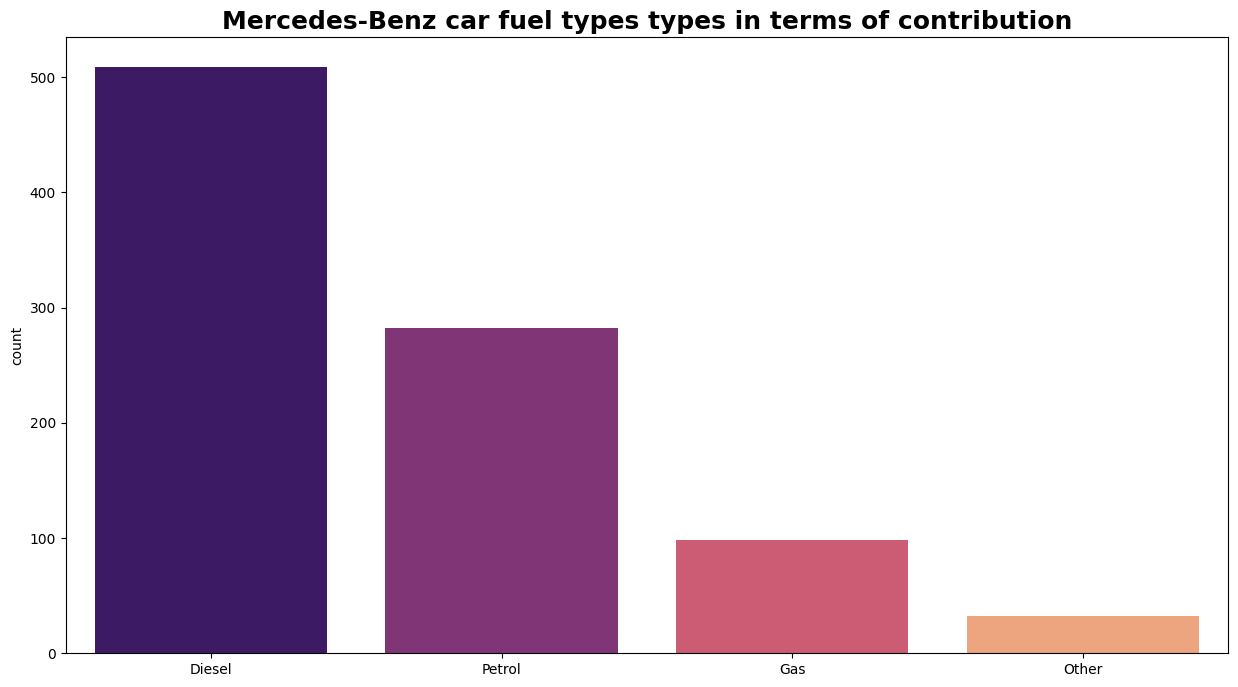

In [ ]:

car2=carsales_data.loc[carsales_data["car"]=="Mercedes-Benz"]
top_10=car1["engtype"].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(top_10,palette="magma")
plt.title('Mercedes-Benz car fuel types types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')

Text(0.5, 0, '')

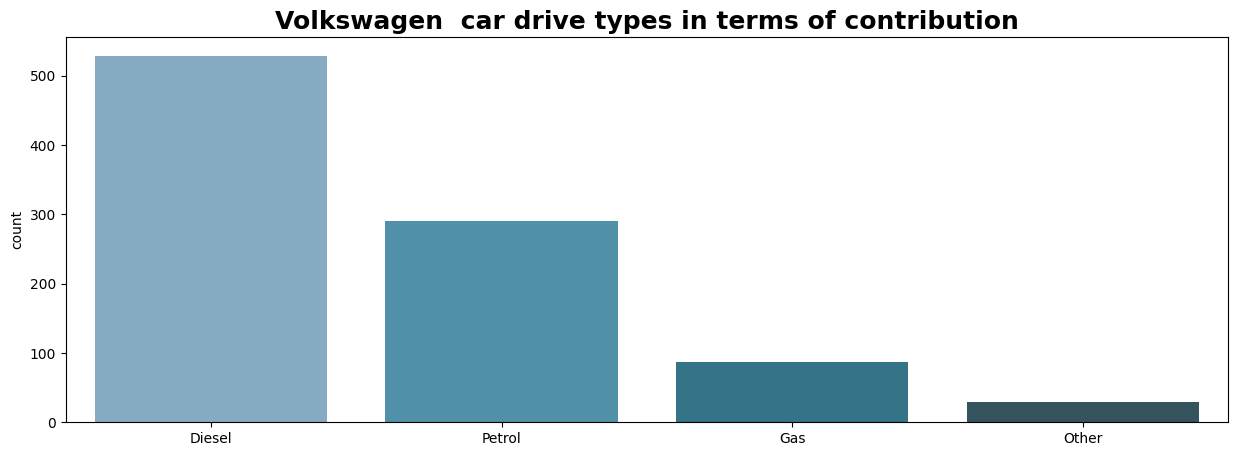

In [ ]:
car1=carsales_data.loc[carsales_data["car"]=="Volkswagen"]
top_10=car1["engtype"].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(top_10,palette="PuBuGn_d")
plt.title('Volkswagen  car drive types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')

Observation:Diesel engines are most preferred in Volkswagen and Mercedes-Benz car companies.